In [ ]:
!pip install fancyimpute #Importing Library

In [ ]:
import operator          #Importing Libraries
from fancyimpute import KNN 
from sklearn.preprocessing import LabelBinarizer
import math
from operator import itemgetter 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, classification_report, r2_score, make_scorer, roc_curve, auc
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score, StratifiedKFold, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
plt.style.use('bmh')
%matplotlib inline
plt.style.use('bmh')

In [ ]:
columns = [  #List of columns and defining catagories of data like nominal, continous, integer, ordinal.
    # nominal
    'gender', #0-1
    'symptoms', #0-1
    'alcohol', #0-1
    'hepatitis b surface antigen', #0-1
    'hepatitis b e antigen', #0-1
    'hepatitis b core antibody', #0-1
    'hepatitis c virus antibody', #0-1
    'cirrhosis', #0-1
    'endemic countries', #0-1
    'smoking', #0-1
    'diabetes', #0-1
    'obesity', #0-1
    'hemochromatosis', #0-1
    'arterial hypertension', #0-1
    'chronic renal insufficiency', #0-1
    'human immunodeficiency virus', #0-1
    'nonalcoholic steatohepatitis', #0-1
    'esophageal varices', #0-1
    'splenomegaly', #0-1
    'portal hypertension', #0-1
    'portal vein thrombosis', #0-1
    'liver metastasis', #0-1
    'radiological hallmark', #0-1
    
    # integer
    'age', # age at diagnosis
    
    # continuous
    'grams of alcohol per day',
    'packs of cigarets per year',
    
    # ordinal
    'performance status',
    'encephalopathy degree',
    'ascites degree',
     
    # continuous   
    'international normalised ratio',
    'alpha-fetoprotein',
    'haemoglobin',
    'mean corpuscular volume',
    'leukocytes',
    'platelets',
    'albumin',
    'total bilirubin',
    'alanine transaminase',
    'aspartate transaminase',
    'gamma glutamyl transferase',
    'alkaline phosphatase',
    'total proteins',
    'creatinine',
    
    # integer
    'number of nodules',
    
    # continuous
    'major dimension of nodule cm',
    'direct bilirubin mg/dL',
    'iron',
    'oxygen saturation %',
    'ferritin',
        
    #nominal
    'survival', #0-1
]

columns = list([x.replace(' ', '_').strip() for x in columns]) 

In [ ]:
 #from google.colab import files
 #uploaded = files.upload()

In [ ]:
# uploaded

In [ ]:
#df = pd.read_csv("hcc-data.csv",
 #                names=columns, 
  #               header=None,
   #              na_values=['?'])

In [ ]:
url = 'https://raw.githubusercontent.com/jklu-jaipur/Liver-Disease-Prediction-Machine-Learning-Model/main/fatty-liver.csv'
df = pd.read_csv(url)   #Reteriving data from github

In [ ]:
df

,gender,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival
0,Male,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67,137.0,15.0,0,1.0,1.0,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,Female,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,62,0.0,NaN,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,Male,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,78,50.0,50.0,2,1.0,2.0,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,Male,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,40.0,30.0,0,1.0,1.0,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,Male,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76,100.0,30.0,0,1.0,1.0,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,0.0,1,NaN,NaN,NaN,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,NaN,NaN,0,1.0,1.0,0.84,NaN,15.4,109.2,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1
161,Female,1.0,0,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,68,0.0,0.0,2,1.0,1.0,1.33,4887.0,12.1,88.9,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,0
162,Male,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,65,NaN,48.0,0,1.0,1.0,1.13,75.0,13.3,90.0,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,1
163,Male,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,44,NaN,NaN,2,1.0,1.0,2.14,94964.0,15.6,117.3,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0


In [ ]:
"""from google.colab import files
df.to_csv('fatty-liver.csv') 
files.download('fatty-liver.csv')
"""

"from google.colab import files\ndf.to_csv('fatty-liver.csv') \nfiles.download('fatty-liver.csv')\n"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          165 non-null    object 
 1   symptoms                        147 non-null    float64
 2   alcohol                         165 non-null    int64  
 3   hepatitis_b_surface_antigen     148 non-null    float64
 4   hepatitis_b_e_antigen           126 non-null    float64
 5   hepatitis_b_core_antibody       141 non-null    float64
 6   hepatitis_c_virus_antibody      156 non-null    float64
 7   cirrhosis                       165 non-null    int64  
 8   endemic_countries               126 non-null    float64
 9   smoking                         124 non-null    float64
 10  diabetes                        162 non-null    float64
 11  obesity                         155 non-null    float64
 12  hemochromatosis                 142 

In [ ]:
data1 = pd.get_dummies(df, columns=["gender"], prefix=["Gender"])
data1 #showing dataset after catagorical values

,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival,Gender_Female,Gender_Male
0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67,137.0,15.0,0,1.0,1.0,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1,0,1
1,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,62,0.0,NaN,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1,1,0
2,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,78,50.0,50.0,2,1.0,2.0,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1,0,1
3,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,40.0,30.0,0,1.0,1.0,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0,0,1
4,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76,100.0,30.0,0,1.0,1.0,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.0,1,NaN,NaN,NaN,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,NaN,NaN,0,1.0,1.0,0.84,NaN,15.4,109.2,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1,1,0
161,1.0,0,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,68,0.0,0.0,2,1.0,1.0,1.33,4887.0,12.1,88.9,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,0,1,0
162,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,65,NaN,48.0,0,1.0,1.0,1.13,75.0,13.3,90.0,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,1,0,1
163,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,44,NaN,NaN,2,1.0,1.0,2.14,94964.0,15.6,117.3,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0,0,1


In [ ]:
data_=data1.drop(columns="Gender_Female") # removing any one of column

In [ ]:
cols = data_.columns.tolist()
cols = cols[-1:] + cols[:-1]
data_ = data_[cols]

In [ ]:
data_ # Getting Gender_Male at first position

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67,137.0,15.0,0,1.0,1.0,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,62,0.0,NaN,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,78,50.0,50.0,2,1.0,2.0,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,40.0,30.0,0,1.0,1.0,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76,100.0,30.0,0,1.0,1.0,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0.0,1,NaN,NaN,NaN,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,NaN,NaN,0,1.0,1.0,0.84,NaN,15.4,109.2,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1
161,0,1.0,0,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,68,0.0,0.0,2,1.0,1.0,1.33,4887.0,12.1,88.9,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,0
162,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,65,NaN,48.0,0,1.0,1.0,1.13,75.0,13.3,90.0,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,1
163,1,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,44,NaN,NaN,2,1.0,1.0,2.14,94964.0,15.6,117.3,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0


In [ ]:
data = data_.copy()

In [ ]:
data.head()

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67,137.0,15.0,0,1.0,1.0,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,62,0.0,NaN,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,78,50.0,50.0,2,1.0,2.0,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,40.0,30.0,0,1.0,1.0,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76,100.0,30.0,0,1.0,1.0,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender_Male                     165 non-null    uint8  
 1   symptoms                        147 non-null    float64
 2   alcohol                         165 non-null    int64  
 3   hepatitis_b_surface_antigen     148 non-null    float64
 4   hepatitis_b_e_antigen           126 non-null    float64
 5   hepatitis_b_core_antibody       141 non-null    float64
 6   hepatitis_c_virus_antibody      156 non-null    float64
 7   cirrhosis                       165 non-null    int64  
 8   endemic_countries               126 non-null    float64
 9   smoking                         124 non-null    float64
 10  diabetes                        162 non-null    float64
 11  obesity                         155 non-null    float64
 12  hemochromatosis                 142 

In [ ]:
data.isnull().sum(axis=0)

Gender_Male                        0
symptoms                          18
alcohol                            0
hepatitis_b_surface_antigen       17
hepatitis_b_e_antigen             39
hepatitis_b_core_antibody         24
hepatitis_c_virus_antibody         9
cirrhosis                          0
endemic_countries                 39
smoking                           41
diabetes                           3
obesity                           10
hemochromatosis                   23
arterial_hypertension              3
chronic_renal_insufficiency        2
human_immunodeficiency_virus      14
nonalcoholic_steatohepatitis      22
esophageal_varices                52
splenomegaly                      15
portal_hypertension               11
portal_vein_thrombosis             3
liver_metastasis                   4
radiological_hallmark              2
age                                0
grams_of_alcohol_per_day          48
packs_of_cigarets_per_year        53
performance_status                 0
e

In [ ]:
data.describe()

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival
count,165.000000,147.000000,165.000000,148.000000,126.000000,141.000000,156.000000,165.000000,126.000000,124.000000,162.000000,155.000000,142.000000,162.000000,163.000000,151.000000,143.000000,113.000000,150.00000,154.000000,162.000000,161.000000,163.000000,165.000000,117.000000,112.000000,165.000000,164.000000,163.000000,161.000000,1.570000e+02,162.000000,162.000000,162.000000,162.000000,159.000000,160.000000,161.000000,162.000000,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000,165.000000
mean,0.806061,0.639456,0.739394,0.108108,0.007937,0.269504,0.217949,0.903030,0.079365,0.508065,0.345679,0.129032,0.049296,0.364198,0.122699,0.019868,0.055944,0.610619,0.56000,0.714286,0.222222,0.223602,0.680982,64.690909,71.008547,20.464286,1.018182,1.158537,1.441718,1.421851,1.929995e+04,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647,0.618182
std,0.396586,0.481800,0.440302,0.311571,0.089087,0.445284,0.414182,0.296817,0.271387,0.501963,0.477064,0.336322,0.217251,0.482697,0.329103,0.140009,0.230621,0.489782,0.49805,0.453228,0.417029,0.417959,0.467533,13.319534,76.277680,51.565130,1.181528,0.428137,0.685819,0.477816,1.490983e+05,2.145237,8.405846,2909.106006,107118.632481,0.685132,5.499379,57.539747,87.484241,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454,0.487311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.170000,5.200000e+00,11.425000,89.775000,5.100000,255.750000,3.000000,0.800000,31.000000,46.250000,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,66.000000,75.000000,0.000000,1.000000,1.000000,1.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,50.000000,71.000000,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000

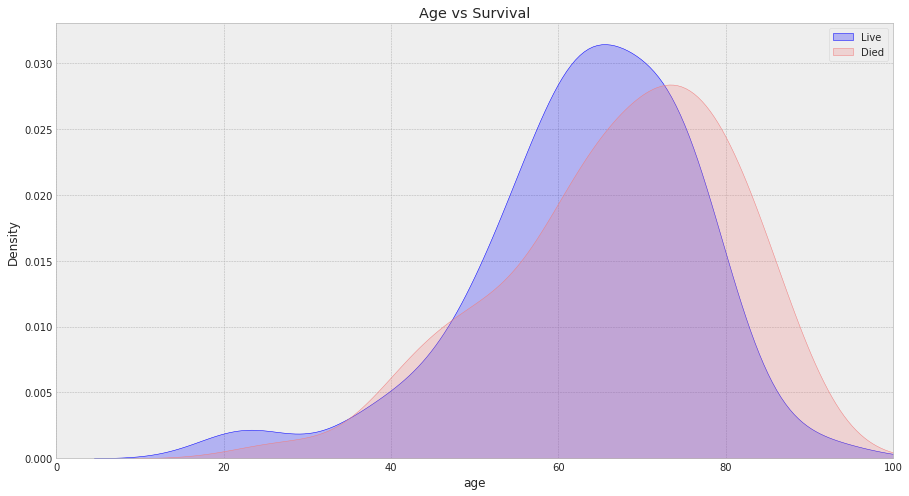

In [ ]:


plt.figure(figsize=(15,8))  #This graph shows line graph between Age Vs Survival, Live & dead

sns.kdeplot(
    data.age[data.survival == 1], 
    color="blue", 
    shade=True
)

sns.kdeplot(
    data.age[data.survival == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('Age vs Survival')
plt.xlim(0,100)

plt.show()



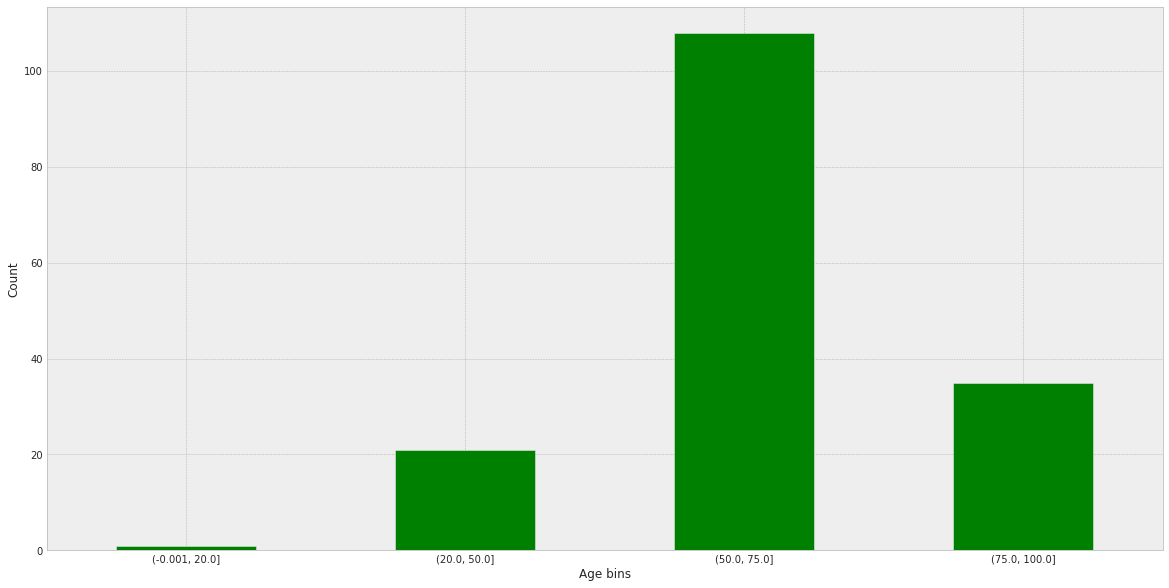

In [ ]:


bins = [0, 20, 50, 75, 100]

out = pd.cut(
    data.age,   #This is count Plot of Age
    bins=bins,
    include_lowest=True
)

ax = out.value_counts(sort=False).plot.bar(
    rot=0, 
    color="g", 
    figsize=(20,10)
)

plt.xlabel('Age bins')
plt.ylabel('Count')
plt.show()

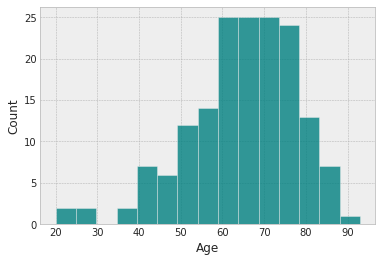

In [ ]:


ax = data.age.hist(
    bins=15,
    color='teal', 
    alpha=0.8
)
#This is Histogram Plot of Age
ax.set(
    xlabel='Age', 
    ylabel='Count'
)

plt.show()



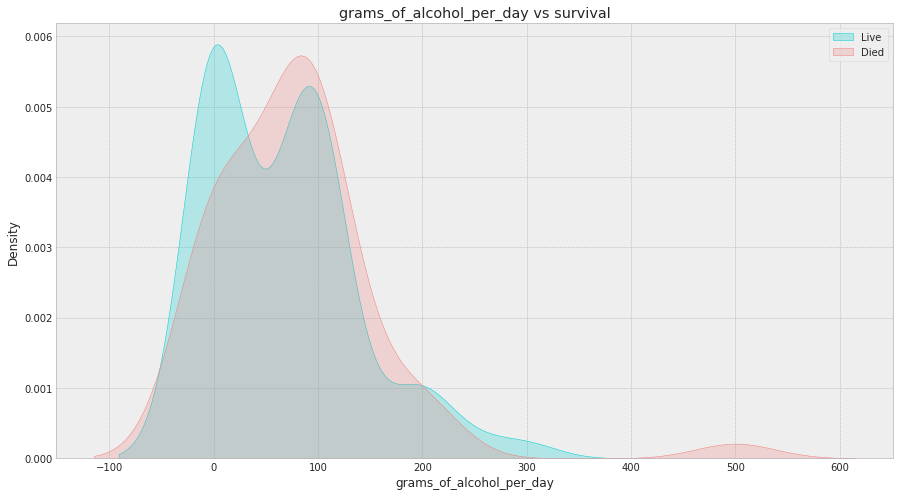

In [ ]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    data.grams_of_alcohol_per_day[data.survival == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    data.grams_of_alcohol_per_day[data.survival == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('grams_of_alcohol_per_day vs survival')
plt.show()

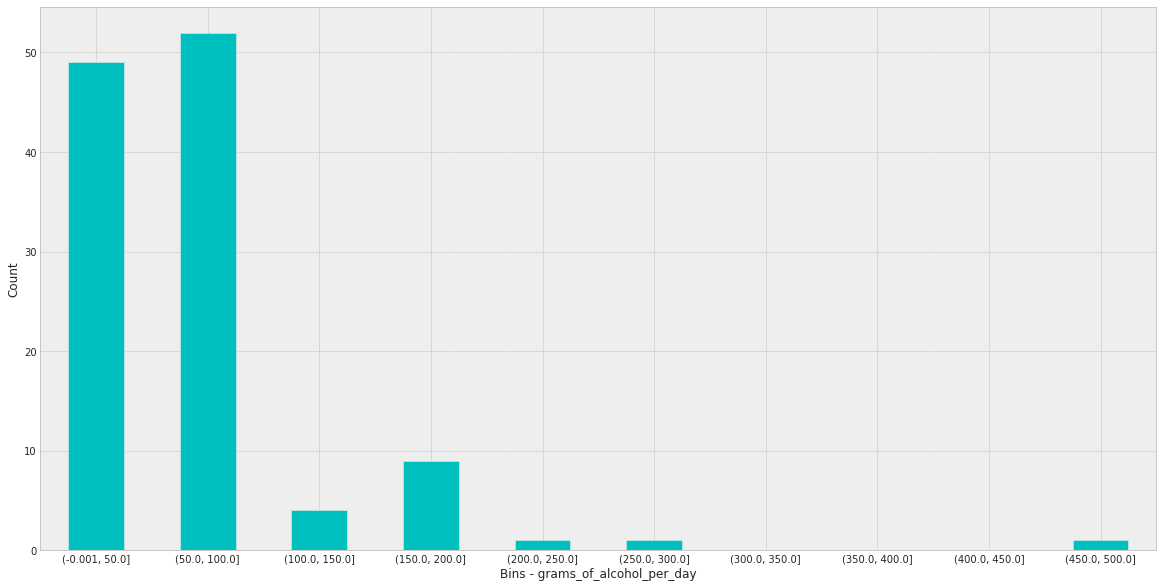

In [ ]:
bins = [
    0, 50, 100, 
    150, 200, 250, 
    300, 350, 400,
    450, 500
]

out = pd.cut(
    data.grams_of_alcohol_per_day, 
    bins=bins,
    include_lowest=True
)

ax = out.value_counts(sort=False).plot.bar(
    rot=0, 
    color='c', 
    figsize=(20,10)
)

plt.xlabel('Bins - grams_of_alcohol_per_day')
plt.ylabel('Count')
plt.show()

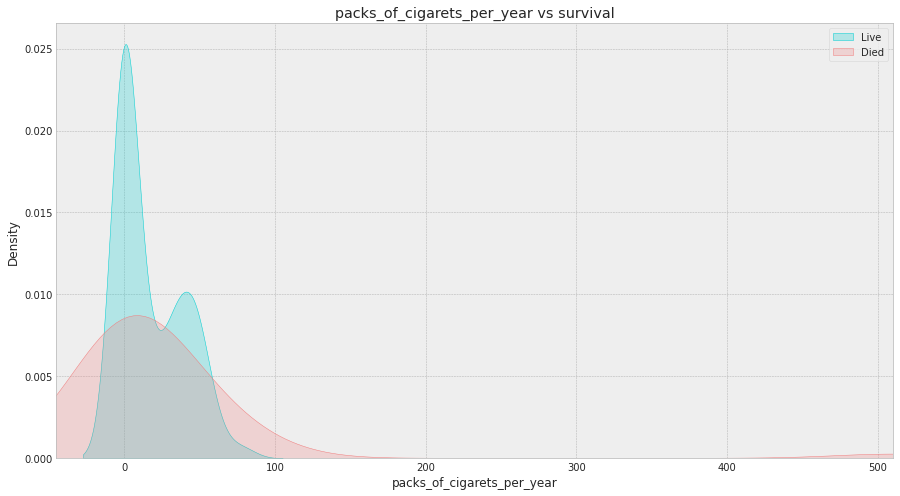

In [ ]:
plt.figure(figsize=(15,8))

sns.kdeplot(
    data["packs_of_cigarets_per_year"][data.survival == 1], 
    color="darkturquoise", 
    shade=True
)

sns.kdeplot(
    data["packs_of_cigarets_per_year"][data.survival == 0], 
    color="lightcoral", 
    shade=True
)

plt.legend(['Live', 'Died'])
plt.title('packs_of_cigarets_per_year vs survival')
plt.xlim(-45, 510)
plt.show()

In [ ]:
for i in data["packs_of_cigarets_per_year"]:
    print(i)

15.0
nan
50.0
30.0
30.0
nan
0.0
20.0
32.0
0.0
nan
0.0
30.0
nan
nan
0.0
nan
60.0
78.0
nan
60.0
47.0
0.0
60.0
nan
0.0
16.0
nan
67.5
2.0
8.0
nan
nan
nan
0.0
0.0
0.0
30.0
0.0
0.0
0.0
0.0
nan
nan
0.0
0.0
0.0
nan
80.0
40.0
0.0
0.0
0.0
0.0
30.0
0.0
10.0
nan
0.0
nan
50.0
40.0
30.0
nan
0.0
0.0
nan
0.0
0.0
0.0
0.0
44.0
48.0
0.0
15.0
nan
nan
nan
nan
34.5
nan
nan
0.0
nan
nan
10.0
nan
33.0
nan
50.0
0.0
nan
0.0
60.0
50.0
0.0
0.0
nan
nan
0.0
0.0
nan
nan
nan
50.0
0.0
1.0
0.0
0.0
nan
30.0
nan
nan
7.5
nan
43.0
60.0
nan
0.0
23.0
0.0
0.0
52.5
0.0
nan
nan
nan
0.0
510.0
0.0
0.0
nan
0.0
0.0
0.0
0.0
40.0
0.0
nan
12.0
0.0
nan
0.0
40.0
37.0
nan
15.0
nan
0.0
0.0
0.0
nan
18.0
0.0
0.0
25.0
0.0
20.0
nan
0.0
nan
0.0
48.0
nan
nan


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

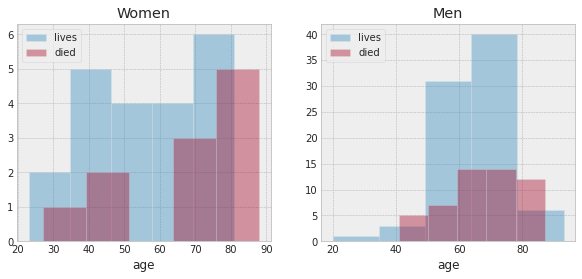

In [ ]:
lives = 'lives'
died = 'died'

fig, axes = plt.subplots(
    nrows=1, 
    ncols=2,
    figsize=(10, 4)
)

# 0-women, 1-men
women = data[data['Gender_Male'] == 0]
men = data[data['Gender_Male'] == 1]

ax = sns.distplot(
    women[women['survival'] == 1].age.dropna(), 
    bins=5, 
    label=lives, 
    ax=axes[0], 
    kde=False
)

ax = sns.distplot(
    women[women['survival'] == 0].age.dropna(),
    bins=5, 
    label=died, 
    ax=axes[0], 
    kde=False
)

ax.legend()
ax.set_title('Women')

ax = sns.distplot(
    men[men['survival'] == 1].age.dropna(), 
    bins=5, 
    label=lives, 
    ax=axes[1], 
    kde=False
)

ax = sns.distplot(
    men[men['survival'] == 0].age.dropna(), 
    bins=5, 
    label = died, 
    ax = axes[1], 
    kde = False
)

ax.legend()
_ = ax.set_title('Men')

In [ ]:
data.groupby(['Gender_Male','survival'])['survival'].count()

Gender_Male  survival
0            0           11
             1           21
1            0           52
             1           81
Name: survival, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


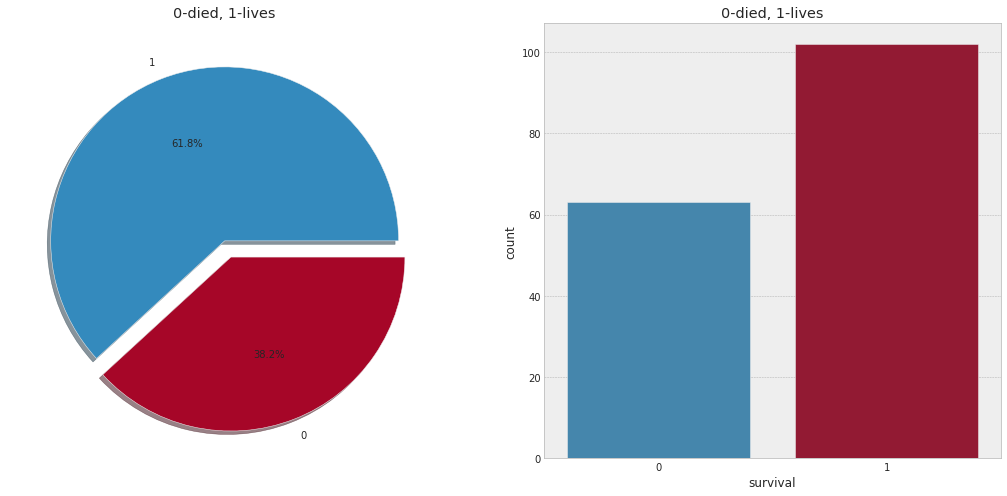

In [ ]:
f, ax=plt.subplots(
    1,
    2,
    figsize=(18,8)
)

data['survival'].value_counts().plot.pie(
    explode=[0,0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)

ax[0].set_title('0-died, 1-lives')
ax[0].set_ylabel('')

sns.countplot(
    'survival',
    data=data,ax=ax[1]
)

ax[1].set_title('0-died, 1-lives')

plt.show()

In [ ]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)

missing_data.head(15)

,Total,Percent
oxygen_saturation_%,80,0.484848
ferritin,80,0.484848
iron,79,0.478788
packs_of_cigarets_per_year,53,0.321212
esophageal_varices,52,0.315152
grams_of_alcohol_per_day,48,0.290909
direct_bilirubin_mg/dL,44,0.266667
smoking,41,0.248485
hepatitis_b_e_antigen,39,0.236364
endemic_countries,39,0.236364


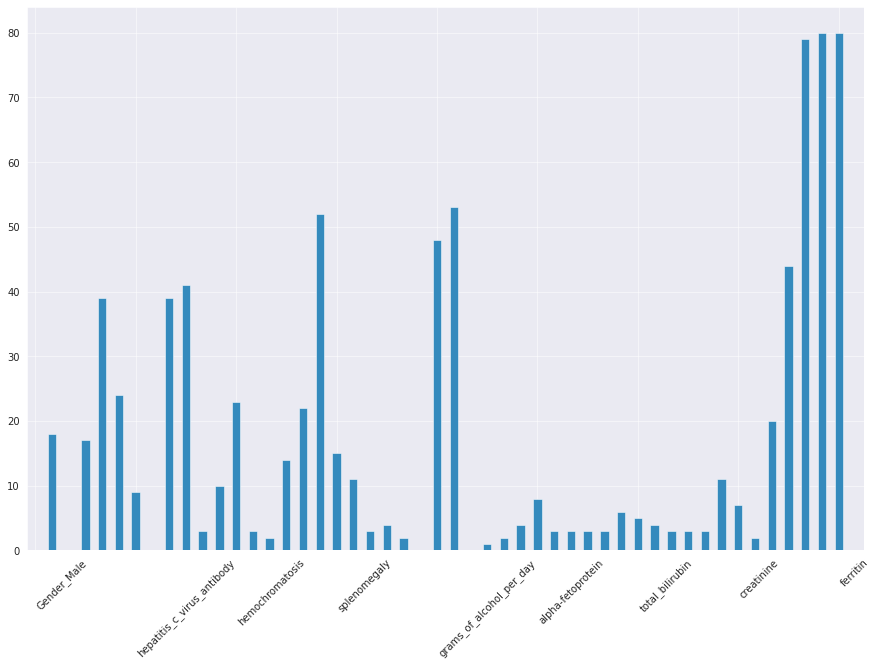

In [ ]:
cons = data.loc[:, :]

cons['null_values'] = cons.isnull().sum(axis=1)

null_values = cons.drop('null_values', axis=1).isnull().sum()

sns.set_style("darkgrid")

plt.figure(figsize=(15,10))

pbar = null_values.plot.bar()

plt.xticks(
    list(range(0,len(null_values.index),6)), 
    list(null_values.index[0::6]), 
    rotation=45, 
    ha='left'
)

plt.show()

In [ ]:
data

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival,null_values
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67,137.0,15.0,0,1.0,1.0,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1,4
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,62,0.0,NaN,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1,22
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,78,50.0,50.0,2,1.0,2.0,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1,0
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,40.0,30.0,0,1.0,1.0,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0,3
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76,100.0,30.0,0,1.0,1.0,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0.0,1,NaN,NaN,NaN,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,NaN,NaN,0,1.0,1.0,0.84,NaN,15.4,109.2,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1,10
161,0,1.0,0,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,68,0.0,0.0,2,1.0,1.0,1.33,4887.0,12.1,88.9,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,0,8
162,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,65,NaN,48.0,0,1.0,1.0,1.13,75.0,13.3,90.0,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,1,9
163,1,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,44,NaN,NaN,2,1.0,1.0,2.14,94964.0,15.6,117.3,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0,9


In [ ]:


data.groupby('survival').count()#we are counting the null values in data

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,null_values
survival,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,63,62,63,53,46,50,57,63,48,46,63,59,47,62,63,55,53,35,57,61,63,62,63,63,50,40,63,63,63,63,60,63,63,63,63,62,63,62,63,63,63,61,61,63,54,48,39,39,40,63
1,102,85,102,95,80,91,99,102,78,78,99,96,95,100,100,96,90,78,93,93,99,99,100,102,67,72,102,101,100,98,97,99,99,99,99,97,97,99,99,99,99,93,97,100,91,73,47,46,45,102


In [ ]:
data2 = data.drop(columns=['null_values']) #we dropped the null column

In [ ]:
data2

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67,137.0,15.0,0,1.0,1.0,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,62,0.0,NaN,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,78,50.0,50.0,2,1.0,2.0,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,40.0,30.0,0,1.0,1.0,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76,100.0,30.0,0,1.0,1.0,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0.0,1,NaN,NaN,NaN,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,NaN,NaN,0,1.0,1.0,0.84,NaN,15.4,109.2,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1
161,0,1.0,0,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,68,0.0,0.0,2,1.0,1.0,1.33,4887.0,12.1,88.9,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,0
162,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,65,NaN,48.0,0,1.0,1.0,1.13,75.0,13.3,90.0,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,1
163,1,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,44,NaN,NaN,2,1.0,1.0,2.14,94964.0,15.6,117.3,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0


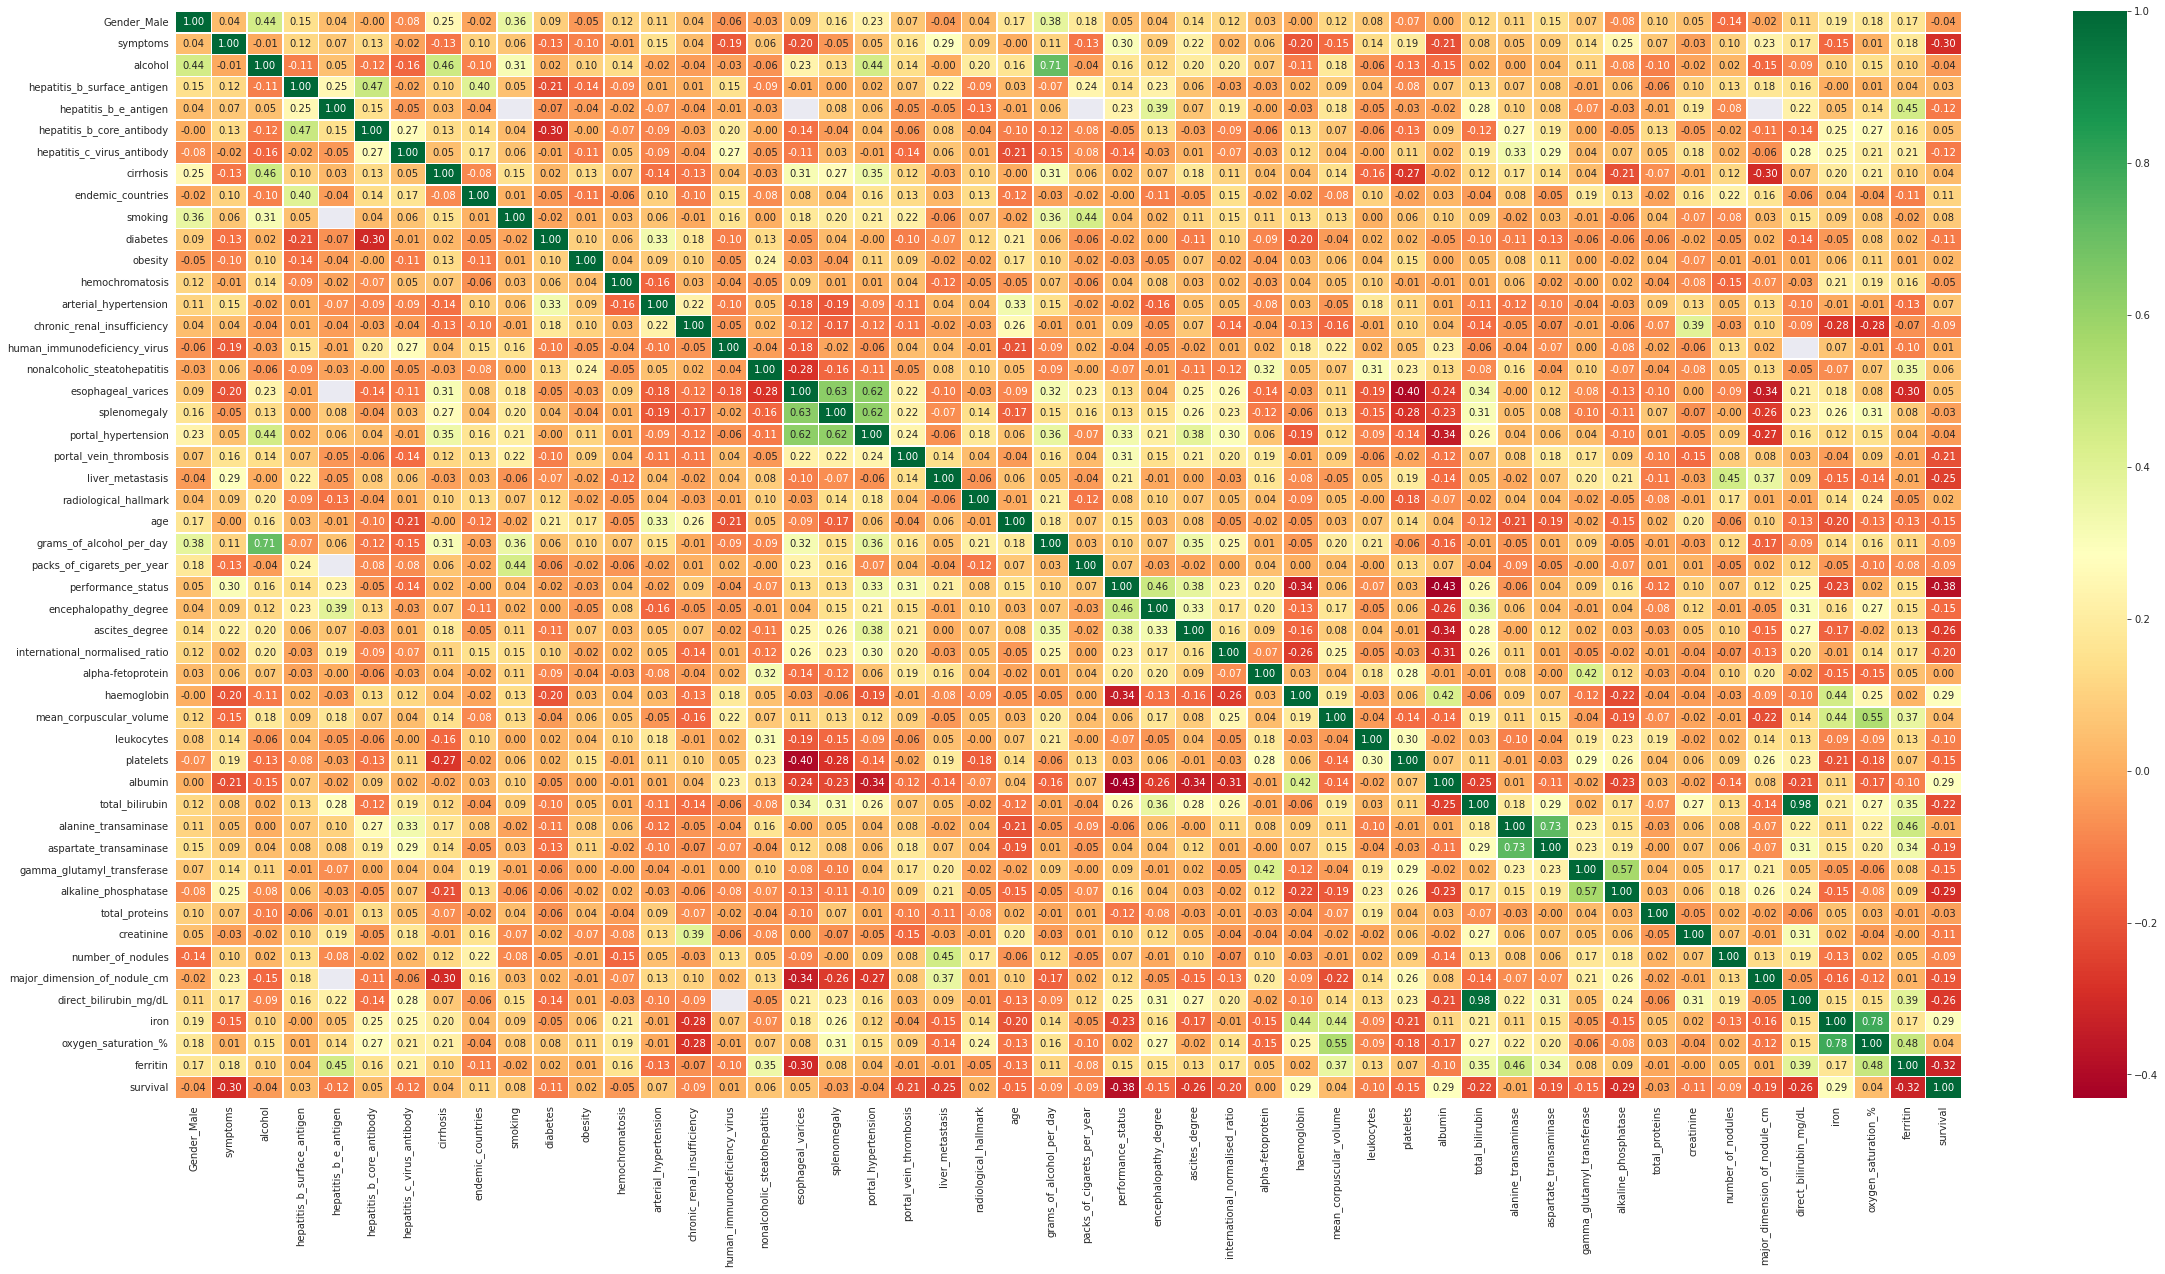

In [ ]:
corr = data2.corr()
#this is a heatmap before removing null values 
sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

In [ ]:
#defining the function for preparing the missing values or nans
def prepare_missing_values_for_nans(df=None, columns=None):
    """
    Looking for the most frequent value for both decision classes outputs - 0,1.
    """
    
    to_update_nans_dict = {}
    
    if columns:
        for decision_class in [0, 1]:
            for column in columns:
                vals = df[df.survival == decision_class][column].value_counts()
                
                to_update_nans_dict['{decision_class}_{column}'.format(
                    decision_class=decision_class,
                    column=column
                )] = vals.idxmax()
                
        return to_update_nans_dict

In [ ]:
#defining the function for replacing the missing values or nans
def replace_missing_values(df=None, columns=None, to_update_nans_dict=None):
    """
    Replacing NaN with the most frequent values for both decission classes outputs - 0,1.
    """
    
    df_list = []
    
    if columns:
        for decision_class in [0, 1]:
            _df = df[df.survival == decision_class].reset_index(drop=True)

            for column in columns:        
                _df[column] = _df[column].fillna(
                    to_update_nans_dict['{}_{}'.format(decision_class, column)]
            )

            df_list.append(_df)

        return df_list

In [ ]:
data2

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67,137.0,15.0,0,1.0,1.0,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,62,0.0,NaN,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,78,50.0,50.0,2,1.0,2.0,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,40.0,30.0,0,1.0,1.0,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76,100.0,30.0,0,1.0,1.0,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0.0,1,NaN,NaN,NaN,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,NaN,NaN,0,1.0,1.0,0.84,NaN,15.4,109.2,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1
161,0,1.0,0,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,68,0.0,0.0,2,1.0,1.0,1.33,4887.0,12.1,88.9,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,0
162,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,65,NaN,48.0,0,1.0,1.0,1.13,75.0,13.3,90.0,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,1
163,1,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,44,NaN,NaN,2,1.0,1.0,2.14,94964.0,15.6,117.3,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0


In [ ]:
# replacing NaNs with the most frequent value in column
nominal_indexes = [
    1, 3, 4, 5, 
    6, 8, 9, 10, 
    11, 12, 13, 
    14, 15, 16, 
    17, 18, 19, 
    20, 21, 22
]

nominal_columns_to_discretize = list(itemgetter(*nominal_indexes)(columns))

In [ ]:
# prepare missing values
nominal_dict = prepare_missing_values_for_nans(
    df=data2, 
    columns=nominal_columns_to_discretize
)

# replace NaN
missing_nominal_values_list = replace_missing_values(
    df=data2,
    columns=nominal_columns_to_discretize,
    to_update_nans_dict=nominal_dict

)

# data2[nominal_columns_to_discretize] = data2[nominal_columns_to_discretize].apply(
#     lambda x:x.fillna(x.value_counts().index[0])
# )

In [ ]:
#Concating all the columns in which we apply imputation
data2 = pd.concat(missing_nominal_values_list).reset_index(drop=True)


In [ ]:
# replacing NaNs with the most frequent value in column
continuous_indexes = [
    24,25,29,30,
    31,32,33,34,
    35,36,37,38,
    39,40,41,42,
    44,45,46,47,
    48]


continuous_columns_to_discretize = list(
    itemgetter(*continuous_indexes)(columns)
)

continuous_data = data2[continuous_columns_to_discretize].values

In [ ]:
data2[continuous_columns_to_discretize]

,grams_of_alcohol_per_day,packs_of_cigarets_per_year,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin
0,40.0,30.0,0.95,2440.0,13.4,97.1,9.0,279.0,3.70,0.40,16.0,64.0,94.0,174.0,8.1,1.11,15.7,0.20,NaN,NaN,NaN
1,NaN,NaN,1.58,110.0,13.4,91.5,5.4,85.0,3.40,3.50,91.0,122.0,242.0,396.0,5.6,0.90,10.0,1.40,53.0,22.0,111.0
2,0.0,0.0,1.40,138.9,10.4,102.0,3.2,42000.0,2.35,2.72,119.0,183.0,143.0,211.0,7.3,0.80,2.6,2.19,171.0,126.0,1452.0
3,NaN,20.0,1.46,9860.0,10.8,92.0,3.0,58.0,3.10,3.20,79.0,108.0,184.0,300.0,7.1,0.52,9.0,1.30,42.0,25.0,706.0
4,NaN,NaN,1.05,100809.0,13.0,94.2,5.7,196.0,4.40,3.00,90.0,334.0,494.0,236.0,7.6,0.80,NaN,1.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.0,0.0,1.52,615.0,11.7,99.7,5.6,70000.0,2.82,3.00,66.0,50.0,120.0,318.0,6.4,0.64,1.9,1.00,NaN,NaN,NaN
161,NaN,20.0,1.41,1.7,14.7,97.2,6900.0,72000.0,3.50,1.30,31.0,24.0,67.0,97.0,7.3,0.76,3.5,0.30,NaN,NaN,NaN
162,0.0,NaN,1.16,1713.0,8.2,94.2,6.0,209000.0,3.60,0.30,62.0,59.0,450.0,263.0,6.8,1.49,7.5,NaN,NaN,NaN,NaN
163,NaN,NaN,0.84,NaN,15.4,109.2,9.3,184000.0,4.60,0.50,35.0,40.0,449.0,109.0,7.6,0.70,3.0,NaN,NaN,NaN,NaN


In [ ]:
#Applying KNN to find nearsest neighbour to fill NAN data
X_filled_knn = KNN(k=3).fit_transform(continuous_data)
data2[continuous_columns_to_discretize] = X_filled_knn

Imputing row 1/165 with 3 missing, elapsed time: 0.018
Imputing row 101/165 with 0 missing, elapsed time: 0.029


In [ ]:
X_filled_knn.shape

(165, 21)

In [ ]:
data2

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival
0,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,40.000000,3.000000e+01,0,1.0,1.0,0.95,2440.000000,13.4,97.1,9.0,279.0,3.70,0.40,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.700000,0.200000,71.658458,26.132335,399.772698,0
1,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,75,1.449521,0.000000e+00,1,1.0,2.0,1.58,110.000000,13.4,91.5,5.4,85.0,3.40,3.50,91.0,122.0,242.0,396.0,5.6,0.90,1.0,10.000000,1.400000,53.000000,22.000000,111.000000,0
2,1,0.0,0,0.0,0.0,1.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49,0.000000,0.000000e+00,0,1.0,1.0,1.40,138.900000,10.4,102.0,3.2,42000.0,2.35,2.72,119.0,183.0,143.0,211.0,7.3,0.80,5.0,2.600000,2.190000,171.000000,126.000000,1452.000000,0
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,61,0.006973,2.000000e+01,3,1.0,1.0,1.46,9860.000000,10.8,92.0,3.0,58.0,3.10,3.20,79.0,108.0,184.0,300.0,7.1,0.52,2.0,9.000000,1.300000,42.000000,25.000000,706.000000,0
4,1,0.0,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,41,52.389143,4.651935e+01,0,1.0,2.0,1.05,100809.000000,13.0,94.2,5.7,196.0,4.40,3.00,90.0,334.0,494.0,236.0,7.6,0.80,5.0,2.825013,1.100000,42.373775,17.538103,202.523324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,36,0.000000,0.000000e+00,0,1.0,1.0,1.52,615.000000,11.7,99.7,5.6,70000.0,2.82,3.00,66.0,50.0,120.0,318.0,6.4,0.64,5.0,1.900000,1.000000,71.460483,31.474347,255.424693,1
161,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,62,0.000000,2.000000e+01,0,1.0,2.0,1.41,1.700000,14.7,97.2,6900.0,72000.0,3.50,1.30,31.0,24.0,67.0,97.0,7.3,0.76,1.0,3.500000,0.300000,115.900579,49.246157,213.347792,1
162,1,1.0,0,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,71,0.000000,6.481933e-11,3,1.0,1.0,1.16,1713.000000,8.2,94.2,6.0,209000.0,3.60,0.30,62.0,59.0,450.0,263.0,6.8,1.49,1.0,7.500000,0.774433,122.988495,43.168314,349.369509,1
163,0,0.0,1,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.000000,0.000000e+00,0,1.0,1.0,0.84,1.500034,15.4,109.2,9.3,184000.0,4.60,0.50,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.000000,0.332674,101.060763,48.704977,596.027501,1


In [ ]:
#assigning all integer columns to a variable
integer_columns = ['age', 'number_of_nodules']

# prepare missing integer values
integer_dict = prepare_missing_values_for_nans(
    df=data2, 
    columns=integer_columns
)

In [ ]:
integer_dict

{'0_age': 72,
 '0_number_of_nodules': 5.0,
 '1_age': 71,
 '1_number_of_nodules': 1.0}

In [ ]:
# replace NaN
missing_integer_values_list = replace_missing_values(
    df=data2,
    columns=integer_columns,
    to_update_nans_dict=integer_dict

)

In [ ]:
data2 = pd.concat(missing_integer_values_list).reset_index(drop=True)

In [ ]:
data2

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival
0,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,40.000000,3.000000e+01,0,1.0,1.0,0.95,2440.000000,13.4,97.1,9.0,279.0,3.70,0.40,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.700000,0.200000,71.658458,26.132335,399.772698,0
1,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,75,1.449521,0.000000e+00,1,1.0,2.0,1.58,110.000000,13.4,91.5,5.4,85.0,3.40,3.50,91.0,122.0,242.0,396.0,5.6,0.90,1.0,10.000000,1.400000,53.000000,22.000000,111.000000,0
2,1,0.0,0,0.0,0.0,1.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49,0.000000,0.000000e+00,0,1.0,1.0,1.40,138.900000,10.4,102.0,3.2,42000.0,2.35,2.72,119.0,183.0,143.0,211.0,7.3,0.80,5.0,2.600000,2.190000,171.000000,126.000000,1452.000000,0
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,61,0.006973,2.000000e+01,3,1.0,1.0,1.46,9860.000000,10.8,92.0,3.0,58.0,3.10,3.20,79.0,108.0,184.0,300.0,7.1,0.52,2.0,9.000000,1.300000,42.000000,25.000000,706.000000,0
4,1,0.0,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,41,52.389143,4.651935e+01,0,1.0,2.0,1.05,100809.000000,13.0,94.2,5.7,196.0,4.40,3.00,90.0,334.0,494.0,236.0,7.6,0.80,5.0,2.825013,1.100000,42.373775,17.538103,202.523324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,36,0.000000,0.000000e+00,0,1.0,1.0,1.52,615.000000,11.7,99.7,5.6,70000.0,2.82,3.00,66.0,50.0,120.0,318.0,6.4,0.64,5.0,1.900000,1.000000,71.460483,31.474347,255.424693,1
161,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,62,0.000000,2.000000e+01,0,1.0,2.0,1.41,1.700000,14.7,97.2,6900.0,72000.0,3.50,1.30,31.0,24.0,67.0,97.0,7.3,0.76,1.0,3.500000,0.300000,115.900579,49.246157,213.347792,1
162,1,1.0,0,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,71,0.000000,6.481933e-11,3,1.0,1.0,1.16,1713.000000,8.2,94.2,6.0,209000.0,3.60,0.30,62.0,59.0,450.0,263.0,6.8,1.49,1.0,7.500000,0.774433,122.988495,43.168314,349.369509,1
163,0,0.0,1,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.000000,0.000000e+00,0,1.0,1.0,0.84,1.500034,15.4,109.2,9.3,184000.0,4.60,0.50,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.000000,0.332674,101.060763,48.704977,596.027501,1


In [ ]:


data2['ascites_degree'].value_counts()



1.0    109
2.0     36
3.0     18
Name: ascites_degree, dtype: int64

In [ ]:
#assigning all ordinal columns to a variable

ordinal_columns = ['encephalopathy_degree', 'ascites_degree', 'performance_status']



In [ ]:
# prepare missing ordinal values
ordinal_dict = prepare_missing_values_for_nans(
    df=data2, 
    columns=ordinal_columns
)

In [ ]:
ordinal_dict

{'0_ascites_degree': 1.0,
 '0_encephalopathy_degree': 1.0,
 '0_performance_status': 0,
 '1_ascites_degree': 1.0,
 '1_encephalopathy_degree': 1.0,
 '1_performance_status': 0}

In [ ]:
# replace NaN
missing_ordinal_values_list = replace_missing_values(
    df=data2,
    columns=ordinal_columns,
    to_update_nans_dict=ordinal_dict

)

In [ ]:
data2 = pd.concat(missing_ordinal_values_list).reset_index(drop=True)

In [ ]:
data2

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival
0,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,40.000000,3.000000e+01,0,1.0,1.0,0.95,2440.000000,13.4,97.1,9.0,279.0,3.70,0.40,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.700000,0.200000,71.658458,26.132335,399.772698,0
1,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,75,1.449521,0.000000e+00,1,1.0,2.0,1.58,110.000000,13.4,91.5,5.4,85.0,3.40,3.50,91.0,122.0,242.0,396.0,5.6,0.90,1.0,10.000000,1.400000,53.000000,22.000000,111.000000,0
2,1,0.0,0,0.0,0.0,1.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49,0.000000,0.000000e+00,0,1.0,1.0,1.40,138.900000,10.4,102.0,3.2,42000.0,2.35,2.72,119.0,183.0,143.0,211.0,7.3,0.80,5.0,2.600000,2.190000,171.000000,126.000000,1452.000000,0
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,61,0.006973,2.000000e+01,3,1.0,1.0,1.46,9860.000000,10.8,92.0,3.0,58.0,3.10,3.20,79.0,108.0,184.0,300.0,7.1,0.52,2.0,9.000000,1.300000,42.000000,25.000000,706.000000,0
4,1,0.0,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,41,52.389143,4.651935e+01,0,1.0,2.0,1.05,100809.000000,13.0,94.2,5.7,196.0,4.40,3.00,90.0,334.0,494.0,236.0,7.6,0.80,5.0,2.825013,1.100000,42.373775,17.538103,202.523324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,36,0.000000,0.000000e+00,0,1.0,1.0,1.52,615.000000,11.7,99.7,5.6,70000.0,2.82,3.00,66.0,50.0,120.0,318.0,6.4,0.64,5.0,1.900000,1.000000,71.460483,31.474347,255.424693,1
161,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,62,0.000000,2.000000e+01,0,1.0,2.0,1.41,1.700000,14.7,97.2,6900.0,72000.0,3.50,1.30,31.0,24.0,67.0,97.0,7.3,0.76,1.0,3.500000,0.300000,115.900579,49.246157,213.347792,1
162,1,1.0,0,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,71,0.000000,6.481933e-11,3,1.0,1.0,1.16,1713.000000,8.2,94.2,6.0,209000.0,3.60,0.30,62.0,59.0,450.0,263.0,6.8,1.49,1.0,7.500000,0.774433,122.988495,43.168314,349.369509,1
163,0,0.0,1,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.000000,0.000000e+00,0,1.0,1.0,0.84,1.500034,15.4,109.2,9.3,184000.0,4.60,0.50,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.000000,0.332674,101.060763,48.704977,596.027501,1


In [ ]:
data2[data2.isnull().any(axis=1)]

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival


In [ ]:
ordinal_columns

['encephalopathy_degree', 'ascites_degree', 'performance_status']

In [ ]:
#binarization data to equalize the dataset and converting data into 0 and 1 
binarized_data = []

for c in ordinal_columns:
    lb = LabelBinarizer()
    
    lb.fit(data2[c].values)
    
    binarized = lb.transform(data2[c].values)
    binarized_data.append(binarized)

In [ ]:


binarized_ordinal_matrix_data = np.hstack(binarized_data)



In [ ]:
binarized_ordinal_matrix_data

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
list(set(data2.number_of_nodules.values))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [ ]:
#Applying label binarizer to fit the data and getting the output

lb = LabelBinarizer()

lb.fit(data2.number_of_nodules.values)

binarized_number_of_nodules = lb.transform(data2.number_of_nodules.values)



In [ ]:

#standarize the age dataset and getting into single
data2['age_'] = data2.age.apply(lambda x: x / data2.age.max())



In [ ]:
data2['age_'].head(10)

0    0.827957
1    0.806452
2    0.526882
3    0.655914
4    0.440860
5    0.774194
6    0.806452
7    0.709677
8    0.688172
9    0.903226
Name: age_, dtype: float64

In [ ]:
age_ = data2.age_.values.reshape(-1,1)

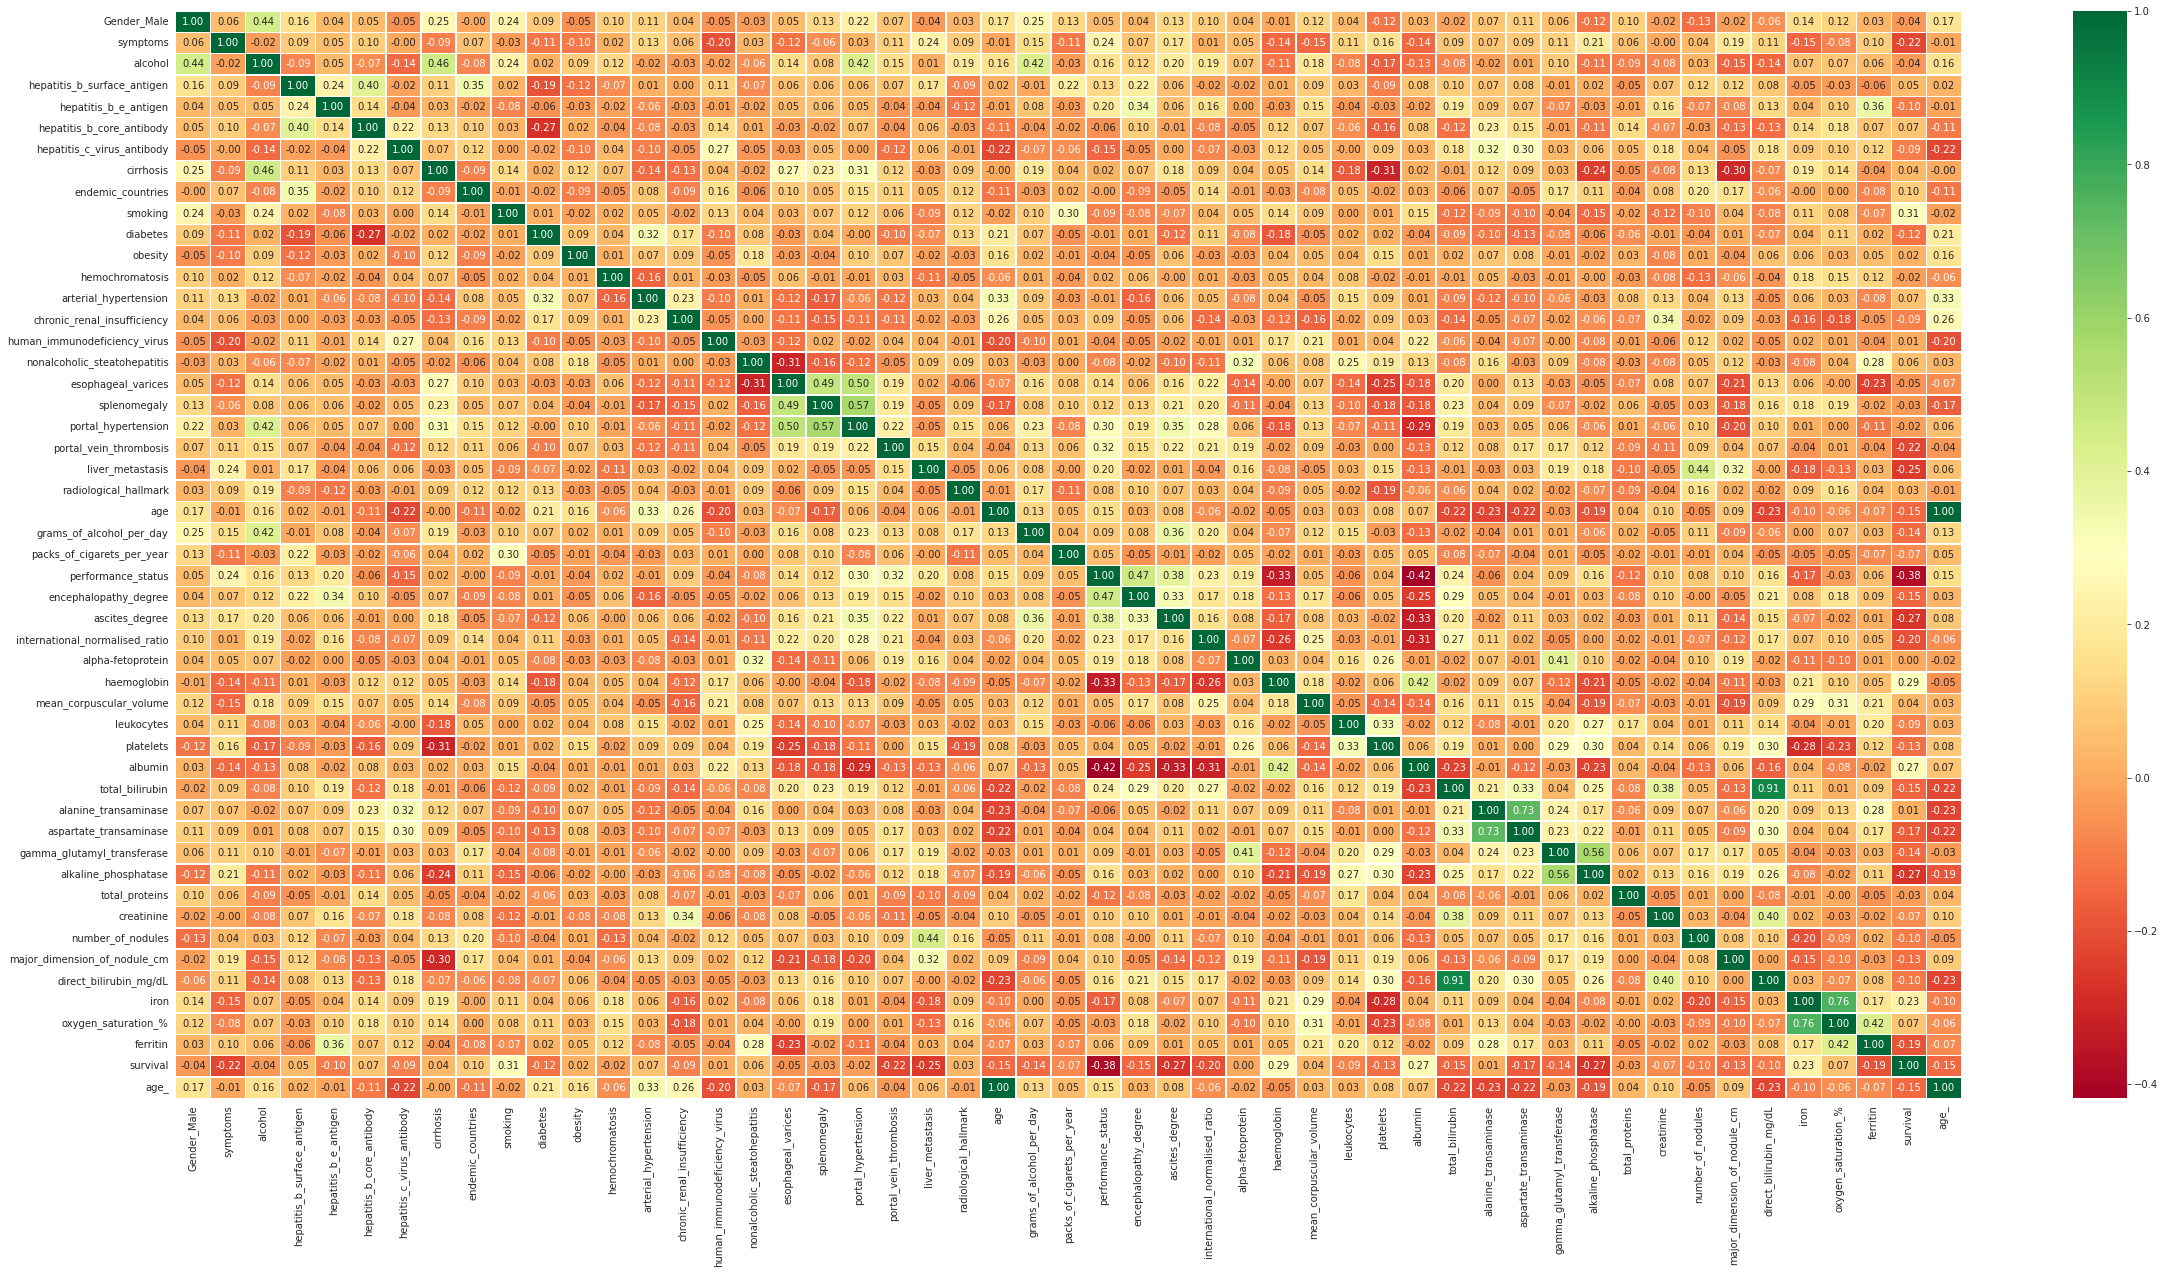

In [ ]:
#Heatmap after removing nans

corr = data2.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()



In [ ]:
data2

,Gender_Male,symptoms,alcohol,hepatitis_b_surface_antigen,hepatitis_b_e_antigen,hepatitis_b_core_antibody,hepatitis_c_virus_antibody,cirrhosis,endemic_countries,smoking,diabetes,obesity,hemochromatosis,arterial_hypertension,chronic_renal_insufficiency,human_immunodeficiency_virus,nonalcoholic_steatohepatitis,esophageal_varices,splenomegaly,portal_hypertension,portal_vein_thrombosis,liver_metastasis,radiological_hallmark,age,grams_of_alcohol_per_day,packs_of_cigarets_per_year,performance_status,encephalopathy_degree,ascites_degree,international_normalised_ratio,alpha-fetoprotein,haemoglobin,mean_corpuscular_volume,leukocytes,platelets,albumin,total_bilirubin,alanine_transaminase,aspartate_transaminase,gamma_glutamyl_transferase,alkaline_phosphatase,total_proteins,creatinine,number_of_nodules,major_dimension_of_nodule_cm,direct_bilirubin_mg/dL,iron,oxygen_saturation_%,ferritin,survival,age_
0,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77,40.000000,3.000000e+01,0,1.0,1.0,0.95,2440.000000,13.4,97.1,9.0,279.0,3.70,0.40,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.700000,0.200000,71.658458,26.132335,399.772698,0,0.827957
1,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,75,1.449521,0.000000e+00,1,1.0,2.0,1.58,110.000000,13.4,91.5,5.4,85.0,3.40,3.50,91.0,122.0,242.0,396.0,5.6,0.90,1.0,10.000000,1.400000,53.000000,22.000000,111.000000,0,0.806452
2,1,0.0,0,0.0,0.0,1.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49,0.000000,0.000000e+00,0,1.0,1.0,1.40,138.900000,10.4,102.0,3.2,42000.0,2.35,2.72,119.0,183.0,143.0,211.0,7.3,0.80,5.0,2.600000,2.190000,171.000000,126.000000,1452.000000,0,0.526882
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,61,0.006973,2.000000e+01,3,1.0,1.0,1.46,9860.000000,10.8,92.0,3.0,58.0,3.10,3.20,79.0,108.0,184.0,300.0,7.1,0.52,2.0,9.000000,1.300000,42.000000,25.000000,706.000000,0,0.655914
4,1,0.0,1,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,41,52.389143,4.651935e+01,0,1.0,2.0,1.05,100809.000000,13.0,94.2,5.7,196.0,4.40,3.00,90.0,334.0,494.0,236.0,7.6,0.80,5.0,2.825013,1.100000,42.373775,17.538103,202.523324,0,0.440860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,36,0.000000,0.000000e+00,0,1.0,1.0,1.52,615.000000,11.7,99.7,5.6,70000.0,2.82,3.00,66.0,50.0,120.0,318.0,6.4,0.64,5.0,1.900000,1.000000,71.460483,31.474347,255.424693,1,0.387097
161,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,62,0.000000,2.000000e+01,0,1.0,2.0,1.41,1.700000,14.7,97.2,6900.0,72000.0,3.50,1.30,31.0,24.0,67.0,97.0,7.3,0.76,1.0,3.500000,0.300000,115.900579,49.246157,213.347792,1,0.666667
162,1,1.0,0,0.0,0.0,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,71,0.000000,6.481933e-11,3,1.0,1.0,1.16,1713.000000,8.2,94.2,6.0,209000.0,3.60,0.30,62.0,59.0,450.0,263.0,6.8,1.49,1.0,7.500000,0.774433,122.988495,43.168314,349.369509,1,0.763441
163,0,0.0,1,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.000000,0.000000e+00,0,1.0,1.0,0.84,1.500034,15.4,109.2,9.3,184000.0,4.60,0.50,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.000000,0.332674,101.060763,48.704977,596.027501,1,0.430108


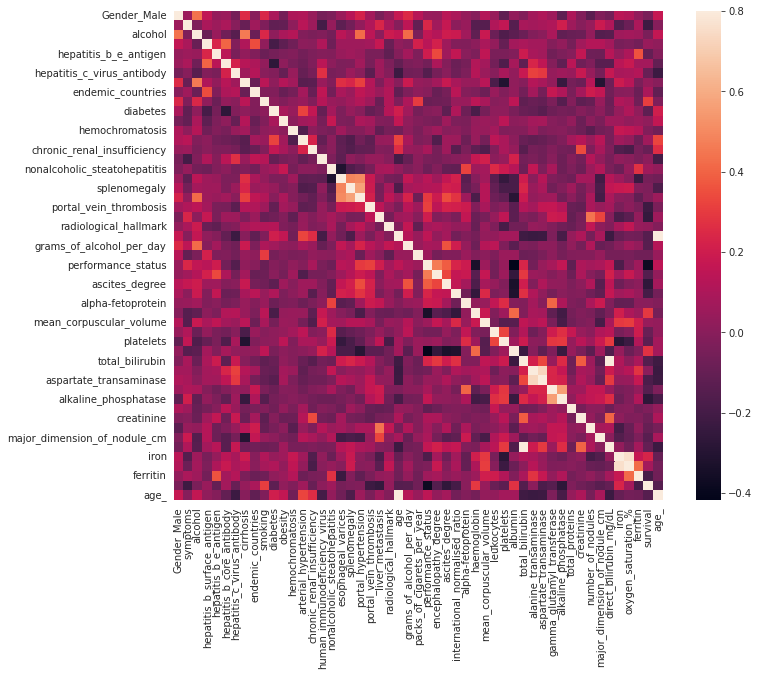

In [ ]:


f, ax = plt.subplots(
    figsize=(12, 9)
)

sns.heatmap(
    data2.corr(), 
    vmax=.8, 
    square=True
)



In [ ]:
#droping duplicate columns that have standarize
to_drop_columns = [
    'age', 
    'encephalopathy_degree', 
    'ascites_degree', 
    'performance_status', 
    'number_of_nodules'
]

columns_set = set(columns)

_columns = list(columns_set.difference(to_drop_columns))

In [ ]:
for i in range(len(_columns)):
  if _columns[i]=="gender":
    _columns[i]="Gender_Male"

In [ ]:
_columns

['endemic_countries',
 'hemochromatosis',
 'alcohol',
 'direct_bilirubin_mg/dL',
 'alkaline_phosphatase',
 'smoking',
 'diabetes',
 'hepatitis_b_core_antibody',
 'symptoms',
 'chronic_renal_insufficiency',
 'human_immunodeficiency_virus',
 'portal_hypertension',
 'packs_of_cigarets_per_year',
 'alanine_transaminase',
 'total_proteins',
 'arterial_hypertension',
 'creatinine',
 'obesity',
 'liver_metastasis',
 'iron',
 'ferritin',
 'hepatitis_b_surface_antigen',
 'major_dimension_of_nodule_cm',
 'Gender_Male',
 'portal_vein_thrombosis',
 'cirrhosis',
 'platelets',
 'gamma_glutamyl_transferase',
 'leukocytes',
 'nonalcoholic_steatohepatitis',
 'total_bilirubin',
 'hepatitis_b_e_antigen',
 'oxygen_saturation_%',
 'albumin',
 'mean_corpuscular_volume',
 'haemoglobin',
 'esophageal_varices',
 'radiological_hallmark',
 'international_normalised_ratio',
 'alpha-fetoprotein',
 'splenomegaly',
 'survival',
 'grams_of_alcohol_per_day',
 'aspartate_transaminase',
 'hepatitis_c_virus_antibody']

In [ ]:
X = data2[_columns].values
y = data2.survival.values

In [ ]:


X_new = np.hstack((X, binarized_ordinal_matrix_data, age_, binarized_number_of_nodules))



In [ ]:
X_new.shape

(165, 63)

In [ ]:
std_scaler = StandardScaler() #StandardScaler() # RobustScaler
X_new = std_scaler.fit_transform(X_new)

In [ ]:
#Splitting data into testing and training
X_train, X_test, y_train, y_test = train_test_split(
    X_new,
    y,
    random_state=5,
    test_size=0.30
)

In [ ]:
#appliying Classification logistic regression 

log_reg = LogisticRegression(
    solver='lbfgs',
    random_state=5,
    C=0.1,
    multi_class='ovr',
    penalty='l2',
)



In [ ]:
#fitting dataset
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='ovr', random_state=5)

In [ ]:
#Prediciting data
log_reg_predict = log_reg.predict(X_test)

In [ ]:
log_reg.score(X_test, y_test)

0.92

In [ ]:
y_preds = log_reg.predict(X_test)

In [ ]:
print('\nLogistic Regression Accuracy: {:.2f}%'.format(accuracy_score(y_test, log_reg_predict) * 100))
print('Logistic Regression AUC: {:.2f}%'.format(roc_auc_score(y_test, log_reg_predict) * 100))
print('Logistic Regression Classification report:\n\n', classification_report(y_test, log_reg_predict))


Logistic Regression Accuracy: 92.00%
Logistic Regression AUC: 91.13%
Logistic Regression Classification report:

               precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.90      0.97      0.93        29

    accuracy                           0.92        50
   macro avg       0.93      0.91      0.92        50
weighted avg       0.92      0.92      0.92        50



In [ ]:


kfold = StratifiedKFold(
    n_splits=5, 
    shuffle=True, 
    random_state=42
)

predicted = cross_val_predict(
    log_reg, 
    X_new, 
    y, 
    cv=kfold
)

scores = cross_val_score(
    log_reg, 
    X_new, 
    y, 
    cv=kfold,
    scoring='f1'
)

print('Cross-validated scores: {}\n'.format(scores))

print(classification_report(y, predicted))

print("LogisticRegression: F1 after 5-fold cross-validation: {:.2f}% (+/- {:.2f}%)".format(
    scores.mean() * 100,
    scores.std() * 2
))



Cross-validated scores: [0.97435897 1.         0.97560976 0.95238095 0.97674419]

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       102

    accuracy                           0.97       165
   macro avg       0.97      0.97      0.97       165
weighted avg       0.97      0.97      0.97       165

LogisticRegression: F1 after 5-fold cross-validation: 97.58% (+/- 0.03%)


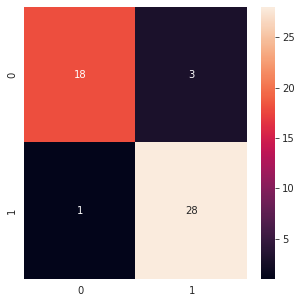

In [ ]:
#Making confusion matrix 
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Applying Random Forest Classifer
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
count = 0
for i in range( len(y_test) ):
    if pred_rf[i] != y_test[i]: 
        count = count + 1
error = count/len(pred_rf)
print( "Error for RF = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy for RF = %f " % (accuracy*100) + '%' )

Error for RF = 2.000000 %
Accuracy for RF = 98.000000 %


In [ ]:
accuracy_score(y_test, pred_rf)

0.98

In [ ]:
cr = classification_report(y_test, pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



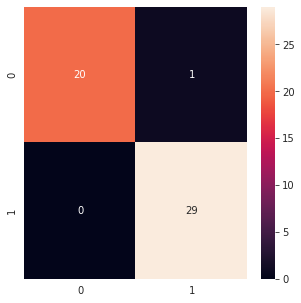

In [ ]:
#Making confusion matrix 
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, pred_rf)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

# **Naive Bayes**

In [ ]:
#Applying Naive Bayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(y_pred)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test, y_pred))

[1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 0 1 1 1 0 1]
Accuracy: 0.98


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



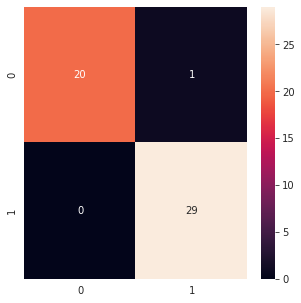

In [ ]:
#Making confusion matrix 
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

# **SVC ALGO**

In [ ]:
#Applying SVC
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.92

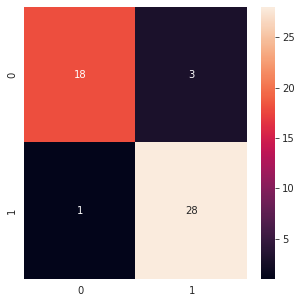

In [ ]:
#Making confusion matrix 
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.92


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.90      0.97      0.93        29

    accuracy                           0.92        50
   macro avg       0.93      0.91      0.92        50
weighted avg       0.92      0.92      0.92        50



# **KNN**

In [ ]:
#Applying KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.78


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.57      0.69        21
           1       0.75      0.93      0.83        29

    accuracy                           0.78        50
   macro avg       0.80      0.75      0.76        50
weighted avg       0.80      0.78      0.77        50



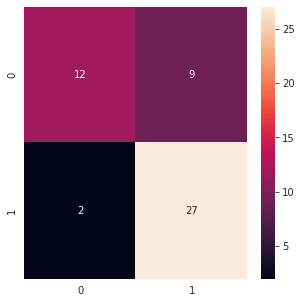

In [ ]:
#Making confusion matrix 
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.78
